### Importing required libraries

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

### Importing the csv file

In [108]:
fname='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/coursera/project/kc_house_data_NaN.csv'
df=pd.read_csv(fname).dropna(how='all')

#### Displaying first three elments of the file

In [73]:
df.head(3)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


#### Displaying Data types of all files

In [74]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

#### Generating descriptive statisctics

In [75]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#### Removing columns 'id' and 'Unnamed :0'

In [76]:
df.drop(columns=["id", "Unnamed: 0"],inplace =True)

In [77]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#### Using value_counts to get counts of unique ranges

In [78]:
df["floors"].value_counts().to_frame()

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


#### Replacing NaN values or null values from 'bedrooms and bathrooms' columns with their mean

In [79]:
x=df['bedrooms'].isnull().sum()
y=df['bathrooms'].isnull().sum()
x,y

(13, 10)

In [80]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [81]:
x=df['bedrooms'].isnull().sum()
y=df['bathrooms'].isnull().sum()
x,y

(0, 0)

#### Plotting a Boxplot for Waterfront vs Price

C:\Users\Amit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Waterfront vs Price')

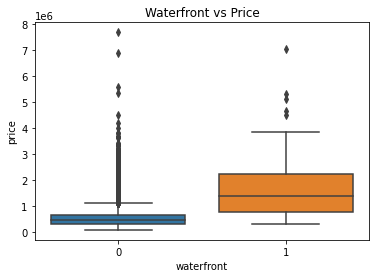

In [111]:
## using seaborn to plot

x=df['waterfront']
y=df['price']

sns.boxplot(x,y)
plt.title("Waterfront vs Price")

#### Plotting regplot for 'sqft_above to determine if the feature is negatively or positively correlated with 'price'

C:\Users\Amit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Regression Plot')

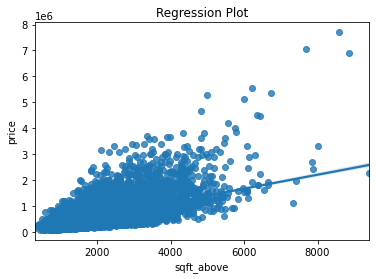

In [83]:
##using seaborn to plot regression

sns.regplot(df['sqft_above'], df['price'])
plt.title("Regression Plot")

In [84]:
print("It is positively correlated")

It is positively correlated


#### Fitting Linear Regression model to predict the price using the feature 'sqft_living' then calculating the R^2

In [85]:
##using LinerRegression()

X = df[['sqft_living']]
Y = df['price']

lm = LinearRegression()
lm.fit(X, Y)
q=lm.predict(X)

print("The predicted Values are:")
for i in q:
    print(i,end=", ")

The predicted Values are:


287555.0670245151, 677621.826401968, 172499.4041865614, 506441.44998452463, 427866.85097323917, 1477398.994909695, 437688.6758496498, 253880.23887682136, 455929.207762984, 486797.8002317033, 955439.1586204416, 281942.59566656617, 357710.95899887715, 340873.54492503026, 464347.9147999074, 784258.7822029982, 486797.8002317033, 405416.9655414433, 293167.5383824641, 307198.7167773365, 411029.4368993923, 812321.1389927431, 593434.7560327335, 256686.47455579584, 643946.9982542743, 436285.5580101626, 643946.9982542743, 349292.2519619537, 382967.0801096475, 677621.826401968, 607465.934427606, 290361.3027034896, 610272.1701065805, 262298.9459137448, 534503.8067742694, 601853.463069657, 422254.3796152902, 618690.8771435039, 298780.00974041305, 691653.0047968404, 677621.826401968, 1140650.7134327572, 965260.9834968522, 396998.2585045199, 315617.42381425994, 843189.7314614623, 234236.589124, 599047.2273906826, 307198.7167773365, 728975.939327201, 290361.3027034896, 840383.4957824878, 352098.487640

133212.10468091868, 1474592.7592307206, 1154681.8918276296, 433479.32233118813, 357710.95899887715, 756196.4254132535, 562566.1635640142, 450316.736405035, 714102.8902286362, 197755.52529733174, 203367.9966552807, 338067.3092460558, 453122.9720840095, 526085.0997373459, 287555.0670245151, 638334.5268963252, 321229.8951722089, 618690.8771435039, 293167.5383824641, 237042.82480297447, 393069.5285539556, 486797.8002317033, 464347.9147999074, 722521.5972655597, 817933.610350692, 540116.2781322184, 411029.4368993923, 279136.3599875917, 307198.7167773365, 357710.95899887715, 178111.87554451037, 293167.5383824641, 548534.9851691418, 843189.7314614623, 714102.8902286362, 186530.58258143382, 461541.67912093294, 447510.50072606053, 388579.55146759644, 273523.8886296427, 377354.6087516985, 405416.9655414433, 293167.5383824641, 430673.08665221365, 593434.7560327335, 492410.27158965217, 416641.90825734125, 551341.2208481163, 349292.2519619537, 169693.16850758693, 256686.47455579584, 366129.66603580

402610.72986246884, 416641.90825734125, 798289.9605978706, 562566.1635640142, 655171.9409701722, 318423.6594932344, 851608.4384983857, 388579.55146759644, 556953.6922060653, 231430.3534450255, 643946.9982542743, 338067.3092460558, 1250093.904912762, 2055483.5447784378, 759002.6610922279, 464347.9147999074, 585016.0489958101, 969470.337015314, 363323.4303568261, 363323.4303568261, 467154.1504788819, 1533523.7084891847, 540116.2781322184, 455929.207762984, 1174325.5415804512, 759002.6610922279, 669203.1193650445, 276330.1243086172, 326842.36653015786, 528891.3354163205, 458735.44344195846, 492410.27158965217, 366129.6660358006, 354904.72331990267, 458735.44344195846, 346486.0162829792, 483991.5645527288, 396998.2585045199, 711296.6545496618, 425060.6152942647, 248267.7675188724, 394192.0228255454, 368935.9017147751, 537310.0424532439, 340873.54492503026, 270717.65295066824, 697265.4761547893, 245461.5318398979, 270717.65295066824, 441898.0293681116, 542922.5138111929, 214592.93937117863,

455929.207762984, 562566.1635640142, 223011.64640810207, 427866.85097323917, 599047.2273906826, 1118200.8280009613, 1056463.6430635229, 377354.6087516985, 439091.7936891371, 697546.0997226868, 1339893.4466399455, 646753.2339332487, 516263.2748609353, 801096.1962768452, 312811.18813528545, 820739.8460296665, 425060.6152942647, 368935.9017147751, 441898.0293681116, 256686.47455579584, 422254.3796152902, 632722.0555383763, 248267.7675188724, 228624.11776605103, 773033.8394871003, 613078.4057855549, 483991.5645527288, 267911.41727169376, 739359.0113394065, 402610.72986246884, 1555973.5939209806, 293167.5383824641, 854414.6741773603, 380160.844430673, 483991.5645527288, 817933.610350692, 548534.9851691418, 615884.6414645293, 874058.3239301816, 579403.5776378611, 1637354.4286112403, 450316.736405035, 573791.1062799122, 391385.7871465709, 1379180.746145588, 248267.7675188724, 674815.5907229935, 475572.85751580534, 542922.5138111929, 520472.6283793971, 663029.4008713006, 744971.4826973556, 686

1199581.6626912213, 124793.39764399524, 638334.5268963252, 916151.8591147988, 287555.0670245151, 520472.6283793971, 301586.24541938753, 728134.0686235086, 321229.8951722089, 279136.3599875917, 579403.5776378611, 531697.571095295, 433479.32233118813, 408223.2012204178, 719715.3615865852, 570984.8706009376, 722521.5972655597, 655171.9409701722, 380160.844430673, 1280962.4973814813, 1025595.0505948036, 503635.2143055501, 321229.8951722089, 408223.2012204178, 528891.3354163205, 152855.75443374005, 228624.11776605103, 211786.70369220414, 253880.23887682136, 568178.6349219632, 531697.571095295, 166886.93282861245, 180918.11122348486, 930183.0375096712, 346486.0162829792, 208980.46801322966, 251074.00319784688, 632722.0555383763, 287555.0670245151, 276330.1243086172, 152855.75443374005, 534503.8067742694, 582209.8133168356, 503635.2143055501, 545728.7494901674, 554147.4565270909, 483991.5645527288, 604659.6987486314, 203367.9966552807, 1485817.7019466185, 318423.6594932344, 239849.06048194895

307198.7167773365, 599047.2273906826, 514860.157021448, 545728.7494901674, 220205.4107291276, 416641.90825734125, 478379.0931947798, 545728.7494901674, 377354.6087516985, 427866.85097323917, 1050851.1717055738, 349292.2519619537, 686040.5334388914, 360517.1946778516, 481185.32887375425, 787065.0178819727, 641140.7625752997, 271278.90008646314, 253880.23887682136, 559759.9278850397, 826352.3173876154, 203367.9966552807, 655171.9409701722, 259492.71023477032, 666396.8836860701, 293167.5383824641, 756196.4254132535, 784258.7822029982, 281942.59566656617, 916151.8591147988, 585016.0489958101, 363323.4303568261, 467154.1504788819, 1275350.0260235323, 638334.5268963252, 506441.44998452463, 360517.1946778516, 722521.5972655597, 211786.70369220414, 211786.70369220414, 638334.5268963252, 896508.2093619774, 607465.934427606, 310004.952456311, 512053.9213424736, 399804.49418349436, 716909.1259076106, 349292.2519619537, 632722.0555383763, 458735.44344195846, 416641.90825734125, 425060.6152942647, 

447510.50072606053, 643946.9982542743, 500828.97862657567, 876864.5596091561, 652365.7052911976, 551341.2208481163, 436285.5580101626, 430673.08665221365, 570984.8706009376, 506441.44998452463, 380160.844430673, 374548.37307272403, 576597.3419588867, 613078.4057855549, 220205.4107291276, 368935.9017147751, 419448.1439363157, 349292.2519619537, 716909.1259076106, 559759.9278850397, 489604.03591067775, 1185550.4842963489, 599047.2273906826, 430673.08665221365, 823546.081708641, 270717.65295066824, 708490.4188706873, 629915.8198594018, 408223.2012204178, 930183.0375096712, 537310.0424532439, 635528.2912173508, 624303.3485014528, 551341.2208481163, 570984.8706009376, 725327.8329445341, 469960.3861578564, 340873.54492503026, 237042.82480297447, 531697.571095295, 447510.50072606053, 411029.4368993923, 436285.5580101626, 253880.23887682136, 565372.3992429888, 820739.8460296665, 326842.36653015786, 495216.5072686267, 641140.7625752997, 416641.90825734125, 635528.2912173508, 290361.3027034896, 

, 354904.72331990267, 458735.44344195846, 458735.44344195846, 332454.8378881068, 239849.06048194895, 416641.90825734125, 792677.4892399217, 340873.54492503026, 570984.8706009376, 385773.31578862196, 318423.6594932344, 1401630.631577384, 649559.4696122231, 464347.9147999074, 582209.8133168356, 601853.463069657, 526085.0997373459, 517666.39270042256, 969470.337015314, 879670.7952881306, 321229.8951722089, 483991.5645527288, 565372.3992429888, 427866.85097323917, 290361.3027034896, 220205.4107291276, 239849.06048194895, 318423.6594932344, 371742.13739374955, 208980.46801322966, 349292.2519619537, 528891.3354163205, 363323.4303568261, 295973.77406143857, 461541.67912093294, 374548.37307272403, 304392.481098362, 695020.4876116097, 559759.9278850397, 436285.5580101626, 385773.31578862196, 413835.67257836676, 1101363.4139271146, 613078.4057855549, 237042.82480297447, 599047.2273906826, 848802.2028194113, 565372.3992429888, 803902.4319558196, 329648.60220913234, 439091.7936891371, 669203.11936

991920.2224471099, 158468.225791689, 702877.9475127383, 1163100.598864553, 402610.72986246884, 683234.2977599169, 439091.7936891371, 458735.44344195846, 402610.72986246884, 399804.49418349436, 680428.0620809424, 444704.26504708605, 930183.0375096712, 287555.0670245151, 433479.32233118813, 290361.3027034896, 643946.9982542743, 694459.2404758148, 554147.4565270909, 253880.23887682136, 371742.13739374955, 408223.2012204178, 641140.7625752997, 826352.3173876154, 767421.3681291514, 865639.6168932582, 770227.6038081258, 700071.7118337639, 674815.5907229935, 279136.3599875917, 450316.736405035, 860027.1455353092, 854414.6741773603, 307198.7167773365, 237042.82480297447, 164080.69714963797, 565372.3992429888, 621497.1128224784, 601853.463069657, 349292.2519619537, 820739.8460296665, 615884.6414645293, 702877.9475127383, 307198.7167773365, 265105.1815927193, 890895.7380040286, 977889.0440522374, 335261.0735670813, 324036.1308511834, 461541.67912093294, 310004.952456311, 795483.7249188961, 27633

, 408223.2012204178, 475572.85751580534, 475572.85751580534, 495216.5072686267, 444704.26504708605, 357710.95899887715, 354904.72331990267, 354904.72331990267, 394192.0228255454, 526085.0997373459, 876864.5596091561, 338067.3092460558, 287555.0670245151, 500828.97862657567, 321229.8951722089, 419448.1439363157, 276330.1243086172, 669203.1193650445, 921764.3304727478, 461541.67912093294, 310004.952456311, 621497.1128224784, 382967.0801096475, 447510.50072606053, 708490.4188706873, 402610.72986246884, 394192.0228255454, 517666.39270042256, 624303.3485014528, 582209.8133168356, 747777.71837633, 396998.2585045199, 474169.73967631813, 189336.8182604083, 189336.8182604083, 526085.0997373459, 357710.95899887715, 380160.844430673, 380160.844430673, 408223.2012204178, 405416.9655414433, 354904.72331990267, 422254.3796152902, 1143456.9491117317, 885283.2666460795, 649559.4696122231, 248267.7675188724, 475572.85751580534, 1250093.904912762, 652365.7052911976, 554147.4565270909, 615884.6414645293,

279136.3599875917, 635528.2912173508, 447510.50072606053, 447510.50072606053, 565372.3992429888, 669203.1193650445, 430673.08665221365, 405416.9655414433, 253880.23887682136, 514860.157021448, 576597.3419588867, 823546.081708641, 251074.00319784688, 672009.355044019, 544325.6316506801, 382967.0801096475, 728134.0686235086, 293167.5383824641, 469960.3861578564, 281942.59566656617, 447510.50072606053, 629915.8198594018, 1118200.8280009613, 549938.103008629, 680428.0620809424, 298780.00974041305, 413835.67257836676, 335261.0735670813, 430673.08665221365, 433479.32233118813, 486797.8002317033, 194949.28961835726, 652365.7052911976, 430673.08665221365, 183724.34690245934, 1073301.0571373696, 680428.0620809424, 1664013.667561498, 556953.6922060653, 338067.3092460558, 461541.67912093294, 495216.5072686267, 197755.52529733174, 613078.4057855549, 1090138.4712112166, 281942.59566656617, 427866.85097323917, 315617.42381425994, 461541.67912093294, 1149069.4204696808, 629915.8198594018, 220205.4107

1095750.9425691655, 327403.61366595275, 276330.1243086172, 315617.42381425994, 820739.8460296665, 295973.77406143857, 503635.2143055501, 363323.4303568261, 402610.72986246884, 304392.481098362, 360517.1946778516, 930183.0375096712, 1387599.4531825115, 638334.5268963252, 635528.2912173508, 380160.844430673, 293167.5383824641, 585016.0489958101, 481185.32887375425, 267911.41727169376, 857220.9098563348, 542922.5138111929, 326842.36653015786, 332454.8378881068, 242655.29616092343, 298780.00974041305, 298780.00974041305, 346486.0162829792, 789871.2535609473, 360517.1946778516, 391385.7871465709, 490726.53018226754, 349292.2519619537, 556953.6922060653, 326842.36653015786, 691653.0047968404, 601853.463069657, 517666.39270042256, 787065.0178819727, 714102.8902286362, 444704.26504708605, 453122.9720840095, 318423.6594932344, 363323.4303568261, 354904.72331990267, 329648.60220913234, 450316.736405035, 520472.6283793971, 674815.5907229935, 310004.952456311, 635528.2912173508, 239849.06048194895

1118200.8280009613, 318423.6594932344, 646753.2339332487, 399804.49418349436, 152855.75443374005, 632722.0555383763, 568178.6349219632, 503635.2143055501, 694459.2404758148, 531697.571095295, 178111.87554451037, 256686.47455579584, 3756062.3662369736, 607465.934427606, 705684.1831917127, 152855.75443374005, 197755.52529733174, 935795.5088676203, 281942.59566656617, 980695.279731212, 391385.7871465709, 691653.0047968404, 158468.225791689, 343679.78060400474, 284748.83134554065, 284748.83134554065, 413835.67257836676, 486797.8002317033, 239849.06048194895, 528891.3354163205, 1101363.4139271146, 312811.18813528545, 178111.87554451037, 680428.0620809424, 599047.2273906826, 935795.5088676203, 380160.844430673, 629915.8198594018, 208980.46801322966, 312811.18813528545, 251074.00319784688, 784258.7822029982, 475572.85751580534, 509247.6856634992, 629915.8198594018, 618690.8771435039, 399804.49418349436, 458735.44344195846, 753390.189734279, 509247.6856634992, 455929.207762984, 1056463.6430635

467154.1504788819, 627109.5841804272, 548534.9851691418, 231430.3534450255, 307198.7167773365, 989113.9867681353, 582209.8133168356, 301586.24541938753, 543764.3845148853, 422254.3796152902, 413835.67257836676, 427024.98026954685, 795483.7249188961, 559759.9278850397, 767421.3681291514, 812321.1389927431, 352098.4876409282, 596240.991711708, 310004.952456311, 366129.6660358006, 405416.9655414433, 523278.8640583715, 284748.83134554065, 284748.83134554065, 315617.42381425994, 708490.4188706873, 453122.9720840095, 1300606.1471343026, 321229.8951722089, 688846.769117866, 1219225.3124440429, 545728.7494901674, 332454.8378881068, 228624.11776605103, 573791.1062799122, 234236.589124, 287555.0670245151, 231430.3534450255, 621497.1128224784, 492410.27158965217, 1435305.4597250777, 357710.95899887715, 655171.9409701722, 517666.39270042256, 686040.5334388914, 764615.1324501769, 239849.06048194895, 879670.7952881306, 385773.31578862196, 523278.8640583715, 332454.8378881068, 568178.6349219632, 7618

, 279136.3599875917, 545728.7494901674, 559759.9278850397, 657978.1766491466, 947020.4515835182, 318423.6594932344, 520472.6283793971, 74281.15542245458, 568178.6349219632, 279136.3599875917, 517666.39270042256, 736552.7756604321, 391385.7871465709, 568178.6349219632, 396998.2585045199, 590628.520353759, 405416.9655414433, 413835.67257836676, 206174.23233425518, 335261.0735670813, 756196.4254132535, 335261.0735670813, 876864.5596091561, 262298.9459137448, 795483.7249188961, 332454.8378881068, 332454.8378881068, 158468.225791689, 610272.1701065805, 315617.42381425994, 396998.2585045199, 380160.844430673, 649559.4696122231, 290361.3027034896, 512334.54491037107, 402610.72986246884, 279136.3599875917, 562566.1635640142, 453122.9720840095, 649559.4696122231, 436285.5580101626, 478379.0931947798, 279136.3599875917, 1036819.9933107016, 913345.6234358244, 486797.8002317033, 854414.6741773603, 565372.3992429888, 627109.5841804272, 352098.4876409282, 164080.69714963797, 559759.9278850397, 56817

596240.991711708, 399804.49418349436, 475572.85751580534, 172499.4041865614, 551341.2208481163, 815127.3746717175, 708490.4188706873, 579403.5776378611, 279136.3599875917, 231430.3534450255, 430673.08665221365, 326842.36653015786, 211786.70369220414, 186530.58258143382, 321229.8951722089, 503635.2143055501, 986868.9982249558, 725327.8329445341, 206174.23233425518, 262298.9459137448, 284748.83134554065, 686040.5334388914, 517666.39270042256, 944214.2159045436, 352098.4876409282, 352098.4876409282, 503635.2143055501, 231430.3534450255, 907733.1520778753, 593434.7560327335, 380160.844430673, 225817.88208707655, 489604.03591067775, 680428.0620809424, 613078.4057855549, 399804.49418349436, 301586.24541938753, 402610.72986246884, 1920784.232187663, 453122.9720840095, 475572.85751580534, 357710.95899887715, 570984.8706009376, 604659.6987486314, 517666.39270042256, 972276.5726942885, 295973.77406143857, 610272.1701065805, 753390.189734279, 632722.0555383763, 467154.1504788819, 368935.901714775

1222031.5481230172, 267911.41727169376, 363323.4303568261, 773033.8394871003, 686040.5334388914, 161274.4614706635, 641140.7625752997, 599047.2273906826, 158468.225791689, 220205.4107291276, 388579.55146759644, 276330.1243086172, 545728.7494901674, 705684.1831917127, 728134.0686235086, 677621.826401968, 422254.3796152902, 433479.32233118813, 385773.31578862196, 310004.952456311, 730940.3043024831, 469960.3861578564, 562566.1635640142, 453122.9720840095, 576597.3419588867, 1236062.7265178896, 548534.9851691418, 273523.8886296427, 506441.44998452463, 582209.8133168356, 615884.6414645293, 332454.8378881068, 562566.1635640142, 433479.32233118813, 419448.1439363157, 388579.55146759644, 1056463.6430635229, 868445.8525722327, 338067.3092460558, 371742.13739374955, 618690.8771435039, 461541.67912093294, 669203.1193650445, 293167.5383824641, 155661.99011271453, 697265.4761547893, 801096.1962768452, 733746.5399814576, 604659.6987486314, 534503.8067742694, 483991.5645527288, 596240.991711708, 343

318423.6594932344, 169693.16850758693, 736552.7756604321, 542922.5138111929, 815127.3746717175, 267911.41727169376, 458735.44344195846, 469960.3861578564, 756196.4254132535, 354904.72331990267, 178111.87554451037, 601853.463069657, 641140.7625752997, 324036.1308511834, 343679.78060400474, 739359.0113394065, 338067.3092460558, 660784.412328121, 1236062.7265178896, 175305.6398655359, 352098.4876409282, 666396.8836860701, 312811.18813528545, 848802.2028194113, 363323.4303568261, 528891.3354163205, 700071.7118337639, 304392.481098362, 186530.58258143382, 486797.8002317033, 312811.18813528545, 896508.2093619774, 391385.7871465709, 214592.93937117863, 223011.64640810207, 528891.3354163205, 481185.32887375425, 439091.7936891371, 242655.29616092343, 711296.6545496618, 823546.081708641, 256686.47455579584, 531697.571095295, 422254.3796152902, 744971.4826973556, 646753.2339332487, 301586.24541938753, 618690.8771435039, 441898.0293681116, 733746.5399814576, 453122.9720840095, 806708.667634794, 62

, 310004.952456311, 458735.44344195846, 641140.7625752997, 632722.0555383763, 455929.207762984, 489604.03591067775, 225817.88208707655, 416641.90825734125, 194949.28961835726, 559759.9278850397, 736552.7756604321, 245461.5318398979, 498022.74294760125, 540116.2781322184, 944214.2159045436, 206174.23233425518, 416641.90825734125, 1320249.796887124, 248267.7675188724, 747777.71837633, 326842.36653015786, 683234.2977599169, 388579.55146759644, 225817.88208707655, 290361.3027034896, 733746.5399814576, 253880.23887682136, 1081719.7641742933, 276330.1243086172, 492410.27158965217, 613078.4057855549, 284748.83134554065, 318423.6594932344, 464347.9147999074, 467154.1504788819, 579403.5776378611, 1031207.5219527525, 775840.0751660748, 694459.2404758148, 326842.36653015786, 349292.2519619537, 405416.9655414433, 374548.37307272403, 565372.3992429888, 315617.42381425994, 411029.4368993923, 694459.2404758148, 304392.481098362, 321229.8951722089, 638334.5268963252, 486797.8002317033, 486797.80023170

, 152855.75443374005, 276330.1243086172, 728134.0686235086, 652365.7052911976, 273523.8886296427, 733746.5399814576, 436285.5580101626, 559759.9278850397, 587822.2846747846, 787065.0178819727, 601853.463069657, 444704.26504708605, 750583.9540553044, 304392.481098362, 568178.6349219632, 660784.412328121, 1816953.5120656071, 601853.463069657, 860027.1455353092, 593434.7560327335, 472766.62183683086, 1028401.286273778, 422254.3796152902, 899314.445040952, 335261.0735670813, 789871.2535609473, 237042.82480297447, 290361.3027034896, 425060.6152942647, 293167.5383824641, 587822.2846747846, 248267.7675188724, 848802.2028194113, 848802.2028194113, 528891.3354163205, 281942.59566656617, 203367.9966552807, 599047.2273906826, 223011.64640810207, 239849.06048194895, 826352.3173876154, 674815.5907229935, 638334.5268963252, 189336.8182604083, 542922.5138111929, 526085.0997373459, 253880.23887682136, 262298.9459137448, 910539.3877568499, 495216.5072686267, 279136.3599875917, 1070494.8214583953, 48399

461541.67912093294, 396998.2585045199, 582209.8133168356, 636370.1619210431, 281942.59566656617, 360517.1946778516, 532258.8182310899, 736552.7756604321, 1000338.9294840333, 366129.6660358006, 340873.54492503026, 966664.1013363395, 354904.72331990267, 231430.3534450255, 458735.44344195846, 520472.6283793971, 621497.1128224784, 674815.5907229935, 489604.03591067775, 335261.0735670813, 700071.7118337639, 803902.4319558196, 377354.6087516985, 326842.36653015786, 831964.7887455644, 388579.55146759644, 461541.67912093294, 977889.0440522374, 641140.7625752997, 1070494.8214583953, 534503.8067742694, 668641.8722292497, 1154681.8918276296, 326842.36653015786, 893701.973683003, 402610.72986246884, 716909.1259076106, 837577.2601035134, 361920.3125173389, 638334.5268963252, 340873.54492503026, 1373568.2747876393, 478379.0931947798, 1452142.8737989247, 436285.5580101626, 700071.7118337639, 683234.2977599169, 688846.769117866, 453122.9720840095, 1003145.1651630078, 635528.2912173508, 890895.73800402

281942.59566656617, 344802.27487559454, 265105.1815927193, 645630.7396616589, 1219225.3124440429, 1017176.3435578803, 326842.36653015786, 1623323.2502163681, 419448.1439363157, 425060.6152942647, 408223.2012204178, 902120.6807199265, 702877.9475127383, 430673.08665221365, 411029.4368993923, 321229.8951722089, 408223.2012204178, 947020.4515835182, 952632.922941467, 441898.0293681116, 629915.8198594018, 354904.72331990267, 298780.00974041305, 618690.8771435039, 1076107.2928163442, 310004.952456311, 399804.49418349436, 450316.736405035, 916151.8591147988, 761808.8967712023, 499145.2372191909, 298780.00974041305, 643946.9982542743, 478379.0931947798, 377354.6087516985, 396998.2585045199, 315617.42381425994, 852169.6856341807, 430673.08665221365, 402610.72986246884, 761808.8967712023, 680428.0620809424, 469960.3861578564, 777804.4401413569, 326842.36653015786, 439091.7936891371, 188775.5711246134, 248267.7675188724, 739359.0113394065, 352098.4876409282, 1090138.4712112166, 902120.6807199265

1081719.7641742933, 380160.844430673, 613078.4057855549, 714102.8902286362, 1179938.0129384, 1996552.595519974, 335261.0735670813, 343679.78060400474, 469960.3861578564, 368935.9017147751, 781452.5465240238, 267911.41727169376, 739359.0113394065, 1019982.5792368546, 958245.3942994161, 301586.24541938753, 340873.54492503026, 343679.78060400474, 256686.47455579584, 1337087.210960971, 1401630.631577384, 627109.5841804272, 646753.2339332487, 980695.279731212, 1163100.598864553, 408223.2012204178, 688846.769117866, 447510.50072606053, 885283.2666460795, 1384793.2175035372, 253880.23887682136, 1196775.427012247, 545728.7494901674, 419448.1439363157, 624303.3485014528, 284748.83134554065, 666677.5072539675, 236481.57766717958, 330490.4729128247, 1193969.1913332725, 281942.59566656617, 694459.2404758148, 281942.59566656617, 556953.6922060653, 512053.9213424736, 806708.667634794, 374548.37307272403, 621497.1128224784, 467154.1504788819, 310004.952456311, 1177131.7772594255, 265105.1815927193, 5

In [86]:
print("The R2 value is: ",lm.score(X, Y))

The R2 value is:  0.4928532179037931


#### Fitting a Linear Regression model to predict the 'price' using the list of features "floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"

In [90]:
## using features to predict price

features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]     
X = df[features]
Y = df['price']
lm1 = LinearRegression()
lm1.fit(X,Y)

pre=lm1.predict(X)
print("The predicted values are:")
for i in pre:
    print(i,end=", ")

The predicted values are:


283270.3900745958, 662572.3012872487, 306267.58455146477, 408476.54986747354, 532313.8077507727, 1509772.418375019, 222291.67988378927, 191276.5677066818, 402159.26524857804, 295667.6467177458, 886071.1064846516, 425480.59290093184, 483774.12100808695, 386210.7962724231, 442839.1174466349, 974300.7028582394, 536864.6851627864, 428839.51070803776, 175733.25008482859, 177552.13044063747, 468985.33432435244, 1098964.56699422, 370775.3261438422, 179454.3089499846, 490144.5840438828, 146093.82136785612, 667574.3021754287, 470328.6936478093, 471024.5767427832, 712973.1076598726, 576946.6959319338, 396733.8158573136, 578937.2269402333, 453764.0889858492, 368990.1591354832, 679527.441473607, 291364.39772075415, 644816.1234843656, 145491.76699717343, 603389.1551310234, 731815.7068307772, 885291.4791926034, 956639.7252486721, 418389.87602702156, 178306.56035935134, 880342.6012913026, 26154.72172635421, 681643.2072373331, 406141.2129585035, 1417811.5295217745, 227073.31056727841, 681384.904008589

356385.131350819, 917751.1270753555, 384227.71719796583, 371224.66779638827, 471060.39926856384, 314573.9446822703, -59545.75651359558, 504440.6657622978, 695907.7452646531, 340064.81810614467, 717495.9918694422, 436395.8350950889, 500512.05477799475, 652226.804943908, 655137.1504423432, 655137.1504423432, 317492.4197379984, 907140.6388489977, 570822.4396200106, 185732.31141784787, 485956.2481298782, 641012.5209140964, 641012.5209140964, 631998.2721947804, 547425.5471113957, 423221.1086643711, 366000.436101716, 702027.9356962107, 486543.91400513425, 37077.86374499649, 319877.70506218076, 654778.7864559926, 403892.2919938639, 1051491.8882701024, 479937.9168142602, 147700.01907632127, 712675.4328831322, 500279.7330095507, 483851.054948695, 656153.3099958859, 721634.4969429858, 740199.7627710961, 549117.9958547577, 549117.9958547577, 658634.6953559332, 221898.127376955, 198889.80542828888, 514064.3431647718, 219103.38675088435, 505418.89159563184, 324585.5283193737, 878716.8824496716, 770

623725.4868864305, 174858.5623920709, 752602.3905164376, 747272.8860658221, 947372.0977105424, 370395.7880465612, 385727.4322309047, 242161.0419847928, 154890.43890981376, 482874.07457993925, 813413.3327057697, 990161.3026053868, 263411.9299221337, 293651.64383148775, 498604.2231756896, 491535.8719172813, 469023.6851848252, 768981.935627941, 516030.9007786326, 236844.92179011926, 272091.21536677703, 491382.3314386718, 405530.21321921796, 745507.6909628995, 165933.75054780766, 228913.94557966664, 334167.1420140192, 223442.9855395481, 386440.2794655077, 422095.80736146495, 767863.9179468714, 662211.0034892857, 394778.62533000857, 394778.62533000857, 433520.44591709226, 673009.6372992285, 1146303.6734174788, 497026.5236393884, 658260.4103484564, 687582.6283519268, 491309.69343528524, 924997.4438090026, 1205538.1058993377, 760439.9777531698, 615615.0174981095, 680238.5149958692, 948714.6830979884, 357367.2588020377, 393766.0664722845, 450828.2211745791, 775977.1596674621, 263198.2865021601

847765.2046543397, 1259260.490726646, 672744.4271465167, 322315.6667062044, 322315.6667062044, 517015.8499684073, 244287.1804391481, 526724.9713654965, 524391.199721165, 236416.72656293958, 605009.5721769519, 1736005.5403717496, 616747.6407263912, 238551.58022101596, 518827.6816571243, 428616.17523662373, 268528.2560963221, 919725.9501697943, 321769.89599588513, 904903.8131667152, 1118999.6692038253, 819280.1476431899, 222044.93127993494, 492919.43438856304, 184780.35793569311, 251507.6073850207, 189447.90729085729, 330673.57736280933, 895889.9426309131, 348938.52585648745, 388189.6328907646, 208410.5638684146, 560732.8013966642, 324528.9437747672, 395018.1152090803, 126636.53646426648, 495463.54480158165, 805839.9611625597, 567269.3164633736, 822718.3627056591, 428308.7512181327, 322786.4818265997, 624245.0030815601, 149646.7694948353, 672534.079700537, 385057.8343662508, 801456.9975844063, 320592.3798875138, 410917.71000541747, 214176.24866424128, 442279.46467558295, 448307.725581012

, 394140.231924016, 403989.16424201056, 293575.1486239135, 270273.59126482904, 676363.5575646982, 463912.098025769, 1221270.5698065422, 255054.9544311203, 264449.703402631, 645410.6891736649, 469725.8933045082, 1314320.8319856115, 618691.1427463181, 602233.7984276004, 419568.46666497365, 278878.6726400703, 472562.29512720555, 976176.8088338412, 619377.91600753, 98162.04430351406, 420454.35007155687, 217069.10373625532, 261875.33548128605, 343153.27544684336, 363267.04741388187, 404518.0626434684, 245815.37495110556, 886903.0604774691, 616787.85233384, 1164812.5667451508, 270295.36076776683, 475590.03352962434, 464461.41400128976, 524404.5432626829, 465909.8085138835, 408644.1091015488, 990179.3411213569, 407489.160063453, 387302.364340581, 231984.6628460139, 377984.5355175771, 500368.55355199426, 420449.920771461, 1240798.6167235635, 375608.4148004353, 543142.4228301309, 241022.00479056314, 814540.3314601593, 491288.9125103988, 92567.88086909056, 579963.9162125997, 267037.5657338947, 5

1001577.7579686902, 776848.2952405885, 652672.7027934827, 576113.3782105371, 429231.35568075255, 499448.52818061784, 548348.2484830469, 418471.21135127544, 370307.59013290703, 362770.5801562108, 625460.9689974524, 549032.8027200438, 324558.45941688865, 842458.2877025679, 519388.8287157081, 484451.4733143747, 612987.488716606, 416622.63450454175, 528529.202101957, 1576850.5955636762, 773262.9745817669, 582957.1197460555, 394006.7915908247, 1002820.9845300913, 166426.90868390352, 201366.8836711906, 520071.5358867608, 322545.8012867421, 450197.5733077228, 144497.38540661708, 405259.27472480014, 760951.5769128352, -85328.15441556647, 921053.6562285796, 1152351.8748696744, 384962.2642786689, 465862.8293149434, 745426.443042241, 873104.3892803825, 673146.9223328531, 342230.666976694, 486234.83460788056, 523565.69360332564, 383072.0685603991, 385226.45266202465, 336002.5493903421, 522198.066736687, 598480.6608654857, 518398.17161484435, 463913.5891364552, 334867.9132124074, 1205389.894698467,

, 519978.85335016996, 1087453.9004046135, 696028.7854875624, 875552.9679508954, 1121962.4329960719, 509509.03744821995, 567515.5888485275, 604564.9488347806, 787858.7144584283, 503927.7250103615, 207180.30842988566, 134447.41055992618, 341481.0986308679, 518452.14432786405, 1299028.512292821, 2187734.4169799797, 293822.2193034701, 582594.3547758721, 725995.3126417845, 512652.4029311538, 287364.8798220381, 397891.91345062107, 802879.4309104457, 419514.35192423314, 523454.7176989168, 639985.80612709, 776197.0652648881, 386870.04516338557, 772696.2260884568, 194983.96237272024, 724615.9747044146, 377583.7677703202, 999586.5765233003, 440248.16305293515, 606594.4714269936, 398518.6758758575, 780132.9162486754, 389668.39669881016, 948560.0973298214, 403348.01088018715, 138569.2550708428, 760703.6743565723, 760467.6036343388, 301531.07847898453, 85490.19584148005, 752615.7039927617, 880915.0905751325, 612788.0430825055, 435069.65843962505, -38497.19181402773, 235703.4548937492, 79586.1310126

, 999945.537717849, 917499.9570003562, 1058980.6278197914, 425441.05394421145, 512618.4921155013, 467588.82528051734, 146106.19240577891, 1294271.4998072945, 1236638.0974440165, 1086315.734919846, 362349.5378788486, 563606.4999566711, 479630.9038991779, 2163744.721591506, 534368.8882898763, 1191590.114482727, 663456.7370428182, 873936.4348406382, 132475.2216550745, 1379718.7264733203, 468817.6070277393, 288378.4659516886, 857057.6187187508, 689101.4170958363, 489423.3587998748, 323894.7584188096, 234966.32024534792, 507479.75554919615, 634731.2342082448, 444848.50164335966, 987308.9011920206, 383999.046440009, 191693.59881793708, -159503.82326479256, 635315.0089739859, 671187.0618720725, 925256.4348709509, 293080.12163843587, 395784.1251938045, 348505.36015328765, 851816.8040748276, 729143.7947107218, 508789.1257976219, 1132183.151122015, 693485.093668472, 602927.773106046, 475358.740113765, 114714.53252474591, 888509.4386084005, 338115.7159373909, 888295.6742180325, 604960.5045745522,

570529.0204560868, 283175.58685719967, 475381.7446748167, 787298.306928467, 454359.8951768875, 265945.64111603796, 654272.024982404, 439150.9084239565, 762461.4067294225, 156890.5630176477, 539306.1908043548, 451529.5495605245, 397321.2740235776, 188384.99562709033, 624108.7130110897, 256130.3394752741, 383427.0118654184, 338000.43642107025, 477327.79164192453, 705971.5428816825, 680770.0589169078, 801204.271232944, 583573.3320312202, 448040.1594083905, 493681.9260639511, 253192.39967704564, 489241.2381035611, 586190.1884365678, 448143.2901754007, 286454.95511665195, 568755.8845739998, 513317.72174357995, 682356.3467248976, 502649.4804623537, 450677.27886517346, 518455.0928946957, 1108313.9932004325, -51320.027997493744, 517026.0216013789, 464144.07630265504, 589627.180538997, 623240.3115856126, 718139.7211375013, 399804.69502912834, 391522.1057332307, 344914.06196726114, 253389.92004318163, 1010626.5671611577, 768232.1932401508, 796241.9733625166, 665478.4901819192, 1485658.9678522162

409565.687137302, 726317.1086698137, 187903.12887701392, 681852.6369123273, 502222.01105817035, 408655.636175625, 597207.4571535327, 342005.4157880768, 487936.2406903282, 699995.3067483678, 93420.31090404466, 444175.8925536163, 380546.42221233994, 404307.7479125224, 371825.72017060965, 1004327.7293813713, 69971.31742455438, 5424.742219079286, 456896.17864289135, 434325.11178058013, 582858.901811704, 909633.1240916662, 633067.8129106201, 481180.8293781206, 935720.3854358718, 374412.4685970694, 458553.02350566164, 864606.0368450359, 392145.75478601083, 470561.350207679, 243186.98900935054, 723819.5209806599, 407789.6058838591, 852502.447185345, 444929.5532020591, 437688.6370601356, 290604.2922007926, 593865.4170242026, 340545.28346727043, 903959.4596063197, 733755.067165196, 372113.7304543182, 651358.8011420779, 477215.35287108645, 962287.6499253847, 799455.7461375743, 888227.1711077355, 495489.53107794, 824454.5807874128, 817646.1621686704, 495042.25809560716, 261211.70948793367, 335991

279373.39959990233, 444005.8550043851, 355291.1063051857, 425685.6060448773, 430257.9733988531, 462338.99510214105, 668401.7521405257, 568504.4754068926, 379555.2892590724, 524285.3343165405, 479483.506865602, 252956.7914038077, 464349.6742673479, 572213.7360455096, 300856.884725254, 672443.3360993601, 947191.6762338355, 473862.53148343787, 506365.50460583717, 360422.4357128814, 965291.9000508375, 379043.2116709575, 385485.6633653566, 1208388.4171337597, 768620.7816874497, 301160.22091537714, 807095.153679166, 736088.1033462435, 556631.0773409232, 302902.5423098095, 238502.81610506773, 673617.3877516687, 1232136.4963223524, 531324.514985498, 432262.6977024637, 372764.4754206203, 439678.05663101, 316961.39125097543, 413783.5515436046, 779663.5830623917, 551821.2730543688, 393491.87651786953, 609342.4244603664, 406743.14946306124, 327289.9878867455, 966925.5932531357, 272981.26778104156, 685186.2031496055, 775025.7632998303, 880194.6110247746, 398562.18516258895, 491427.6540074162, 43393

In [91]:
print("The R2 vaue is",lm1.score(X, Y))

The R2 vaue is 0.65769516660375


#### Creating tuples, the first element in the tuple contains the name of the estimator while the second is model constructor

In [112]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

Creating a pipeline object that scales the data, performs a polynomial transform and fits a linear regression model.

In [93]:
##using Pipeline()

pipe = Pipeline(Input)
pipe.fit(df[features], Y)

print("The predicted values are : ")
xqc=pipe.predict(df[features])
for i in xqc:
    print(i,end=", ")

The predicted values are : 


349638.25, 559087.75, 449484.25, 393219.75, 521701.75, 2035604.25, 210541.0, 291416.25, 442552.5, 290836.75, 759400.25, 396380.25, 433638.25, 400115.25, 451676.25, 992068.25, 448019.0, 474915.25, 156736.25, 197080.25, 427426.75, 1277334.25, 335503.5, 219660.25, 396969.0, 164509.25, 702117.25, 502235.25, 438734.75, 640472.5, 539137.25, 413700.25, 551857.75, 461244.25, 378563.5, 657046.0, 424440.25, 621214.25, 186976.25, 583573.25, 721523.25, 662652.25, 923700.25, 484219.75, 299900.25, 690220.25, 153962.25, 676815.25, 362257.25, 1241244.25, 282004.25, 536800.25, 421673.25, 490885.75, 758096.25, 795393.25, 320727.5, 380083.25, 956748.25, 467391.25, 667388.0, 309738.25, 489593.75, 552791.25, 448275.25, 553541.25, 815137.25, 284194.5, 197466.25, 819928.25, 1631572.25, 389266.25, 575061.25, 382483.75, 278370.75, 1058888.25, 444429.5, 328788.25, 408101.25, 620228.25, 354694.75, 275312.25, 473587.25, 440377.75, 325502.25, 706928.25, 237823.25, 761696.25, 378303.0, 374938.25, 200595.0, 1051340.

748246.25, 419084.75, 472085.75, 353816.25, 599567.25, 378663.0, 611442.75, 518520.25, 746815.25, 1002892.25, 558477.5, 505216.75, 578566.25, 528247.25, 660469.25, 328504.25, 289572.25, 678810.5, 265628.25, 1163420.25, 746788.25, 469527.75, 475430.25, 594293.25, 592251.25, 724175.25, 144892.25, 387369.25, 988096.25, 515370.75, 212924.25, 35075.25, 270850.25, 285956.25, 314852.25, 657704.25, 349384.5, 1061092.25, 599867.25, 308829.75, 265256.25, 423737.0, 1035528.25, 723830.25, 355740.25, 829204.25, 397364.25, 430930.75, 476807.25, 347938.25, 174224.25, 427436.75, 599485.75, 376482.75, 705448.25, 471906.25, 420202.25, 582027.5, 587089.0, 587089.0, 231540.25, 731980.25, 553691.5, 264836.25, 362487.25, 567848.25, 567848.25, 571788.75, 365738.75, 437122.25, 422719.75, 729212.25, 503984.25, 186524.25, 343784.75, 618647.5, 472315.25, 1024364.25, 525882.75, 163228.25, 661218.25, 467861.0, 483870.75, 555010.75, 708220.5, 726855.25, 553810.5, 553810.5, 464143.25, 280438.25, 234742.75, 478543.75

305252.25, 300055.0, 522220.5, 288947.0, 461060.25, 461060.25, 804113.0, 180606.75, 489000.75, 478731.75, 357132.0, 256427.25, 291388.25, 525066.75, 598246.0, 265566.25, 404168.25, 2126836.25, 445544.25, 582385.5, 509217.0, 363876.25, 445074.25, 350760.25, 281410.25, 508301.75, 1461196.25, 574673.0, 654073.25, 1087705.25, 338312.25, 646919.25, 565027.25, 657908.75, 333198.25, 466072.5, 521100.25, 310390.25, 323527.75, 381754.25, 477287.5, 814896.25, 629396.25, 285838.25, 496352.25, 491484.5, 355355.75, 368206.25, 527919.0, 960172.25, 474517.25, 41066.75, 322740.25, 451738.25, 511103.75, 437984.25, 484348.5, 791353.5, 393738.25, 374194.75, 388444.75, 591088.25, 1379820.25, 710819.25, 413295.25, 179844.25, 609324.5, 206055.25, 457197.25, 418562.25, 354434.25, 263648.25, 263648.25, 490281.25, 444302.25, 413010.25, 696728.25, 280680.75, 5039668.25, 1030244.25, 1120408.25, 317408.25, 591933.5, 486569.75, 97048.75, 425770.25, 750982.25, 270976.25, 548014.25, 691338.0, 208510.25, 470747.25, 4

, 461745.25, 641789.0, 378719.25, 582580.25, 754646.25, 217175.25, 632014.0, 937766.25, 553775.75, 723004.25, 241596.25, 249997.0, 402974.25, 698463.5, 421971.25, 1061116.25, 707270.25, 168882.5, 373536.5, 152783.25, 291008.25, 440310.25, 651819.25, 363047.0, 369480.25, 344474.75, 384646.25, 347136.25, 317964.25, 428066.5, 417156.75, 141350.5, 339849.5, 514504.75, 308696.75, 309522.25, 391662.75, 277412.25, 442379.5, 1024900.25, 625752.0, 462946.75, 481392.25, 301080.25, 78276.5, 578764.75, 547545.75, 287456.25, 563579.5, 408632.25, 384464.25, 483603.75, 648756.25, 392488.25, 477831.0, 487279.25, 670195.25, 577406.25, 577406.25, 900511.75, 230478.25, 1093180.25, 909166.25, 1357316.25, 476012.25, 632038.75, 480756.25, 541807.25, 411828.25, 411828.25, 571818.5, 301944.25, 198696.75, 223797.25, 318670.25, 271771.0, 246952.5, 167594.25, 304022.25, 380980.5, 658794.25, 855560.25, 607288.75, 306042.75, 397758.25, 354415.0, 397689.75, 437455.75, 241354.25, 298887.25, 431089.75, 274164.75, 885

315868.25, 411249.25, 162819.0, 280610.5, 389623.25, 655915.5, 970088.25, 428661.5, 362832.25, 458526.5, 284604.25, 371060.25, 456626.75, 305052.25, 454417.0, 319828.25, 421070.25, 418592.75, 510232.75, 993780.25, 442380.75, 418056.25, 306912.25, 371610.25, 446147.0, 365557.25, 488606.25, 442201.75, 944856.25, 907902.25, 424941.0, 483168.25, 254309.25, 405080.25, 927375.25, 387074.25, 616418.75, 922124.25, 395134.25, 508335.25, 134698.25, 1159820.25, 468657.25, 860408.25, 265173.25, 416554.25, 199062.25, 378663.25, 244212.25, 350852.25, 288718.25, 340916.25, 624740.0, 319043.75, 411334.25, 1098372.25, 1354228.25, 517323.25, 709120.75, 534972.75, 472897.75, 524183.75, 127084.25, 354870.25, 548515.75, 386990.25, 1159406.25, 488794.5, 409544.25, 1148732.25, 304840.25, 743852.25, 213426.25, 241869.25, 480011.75, 577254.75, 188336.25, 352357.0, 463608.75, 467401.5, 932188.25, 448136.25, 444070.75, 249438.25, 580629.25, 836152.25, 542996.0, 429883.75, 473628.25, 744336.75, 380029.75, 486928.

421771.25, 1063808.25, 364799.25, 879668.25, 438066.75, 427755.25, 823389.5, 195414.25, 195414.25, 1012564.25, 1154568.25, 486737.25, 784096.25, 313073.25, 442011.25, 382238.25, 1177084.25, 527954.25, 323605.5, 518308.25, 508374.75, 452568.25, 341360.25, 322363.25, 1408508.25, 374852.0, 368993.75, 684388.25, 849776.25, 398702.75, 926132.25, 410170.25, 751231.25, 564007.5, 1011028.25, 1272740.25, 637759.5, 373668.25, 717757.25, 371604.25, 256460.75, 323545.5, 428641.25, 698478.25, 415453.25, 491102.25, 353941.25, 631345.75, 526680.0, 382822.25, 1032432.25, 123672.25, 505430.25, 665699.25, 363911.75, 913604.25, 529001.25, 356188.25, 402721.75, 535731.0, 291776.25, 523355.25, 500871.25, 922108.25, 643622.25, 594502.0, 578752.75, 480860.25, 541500.25, 504951.0, 378763.25, 381254.25, 150677.75, 542713.0, 482820.5, 502235.75, 799476.25, 428791.0, 519772.5, 600200.25, 457644.25, 492688.75, 1886292.25, 741811.25, 507427.75, 411764.25, 1028706.25, 314442.25, 249070.25, 414764.25, 395610.25, 432

, 354324.25, 283344.25, 738650.25, 657314.5, 310304.25, 185446.25, 807464.0, 893748.25, 555392.75, 388504.25, 276012.25, 322328.25, 224154.25, 381113.25, 553613.0, 541081.25, 683741.25, 216476.25, 365038.25, 263570.25, 654402.75, 427753.25, 1059044.25, 296626.25, 551070.0, 318486.25, 362792.25, 374065.25, 376442.25, 382076.25, 224790.25, 438072.75, 365898.25, 332457.75, 570795.25, 410892.25, 270793.75, 382054.25, 114737.25, 1447700.25, 384204.25, 2272308.25, 450849.5, 1042224.25, 539955.5, 340018.25, 729730.25, 211064.25, 712402.25, 560957.5, 1138199.25, 302408.25, 701285.25, 643911.25, 406840.25, 290952.25, 228207.25, 586205.75, 349906.75, 929086.25, 452294.25, 1182212.25, 534713.75, 468434.25, 283080.25, 314128.25, 583370.0, 434361.5, 499683.75, 486958.25, 398018.25, 374315.25, 561068.0, 349028.25, 667019.75, 294290.75, 383035.75, 594001.5, 262876.25, 524958.0, 390756.25, 342760.25, 540583.25, 564480.75, 535422.75, 406886.25, 858948.25, 1035666.25, 25901.75, 324079.5, 276660.25, 1655

489657.75, 397238.25, 419309.25, 440685.25, 265162.75, 327288.25, 571860.75, 339676.25, 256808.25, 401649.75, 532860.75, 332736.25, 836404.25, 456433.75, 721433.25, 93834.25, 375446.25, 603692.75, 2351180.25, 413964.25, 295168.25, 393780.25, 280827.25, 301426.25, 399514.25, 574224.0, 409984.25, 513977.75, 202028.0, 403711.75, 380770.25, 483856.75, 1048408.25, 444986.25, 944628.25, 331592.25, 624474.25, 264692.5, 261844.25, 777440.25, 383958.25, 410526.25, 423003.25, 406381.25, 756476.75, 437481.5, 600747.0, 492770.25, 816720.25, 691040.25, 567243.5, 356772.25, 362621.25, 524880.0, 330942.25, 431597.25, 1794084.25, 228120.25, 291030.25, 1048880.25, 543948.5, 383260.0, 914873.25, 357669.5, 295056.25, 354766.25, 519178.5, 451086.5, 967114.25, 450276.75, 803765.75, 406720.25, 518007.0, 622520.0, 783490.25, 512754.25, 991207.25, 474335.25, 644185.25, 386504.25, 505465.5, 244901.0, 386658.25, 353480.25, 280464.25, 401233.0, 479960.25, 363869.25, 703719.25, 861648.25, 264916.0, 754464.25, 668

310859.5, 466493.25, 471829.75, 440082.25, 435087.25, 542177.5, 414794.25, 393096.25, 1054190.25, 557442.0, 663217.25, 298355.75, 577644.25, 408580.75, 383520.25, 2692468.25, 356048.75, 917770.25, 1443384.25, 285364.25, 486361.5, 499346.25, 503578.0, 717204.25, 270783.0, 570838.75, 1013225.0, 995572.25, 295395.5, 263942.5, 296210.25, 489374.5, 921908.25, 303124.25, 429339.75, 309312.25, 492584.75, 346212.25, 346212.25, 666132.25, 72092.25, 327972.25, 485531.75, 890612.25, 476185.5, 889652.25, 526403.0, 572100.0, 395905.25, 276564.25, 867338.25, 844186.75, 518812.0, 1152436.25, 457049.75, 299296.25, 336280.25, 1433908.25, 981720.25, 264646.25, 264646.25, 264646.25, 188576.25, 693931.25, 566399.0, 1036916.25, 456619.25, 268726.75, 368422.25, 523449.25, 122661.25, 333656.25, 194604.25, 383220.25, 270881.0, 487188.75, 537927.25, 382248.25, 390768.25, 524519.0, 252668.25, 334663.5, 427072.25, 692183.0, 416348.0, 120865.0, 1020224.25, 558967.25, 280524.25, 641756.25, 492657.75, 358562.25, 44

329844.25, 335238.25, 55426.25, 568658.25, 278513.25, 426920.0, 107687.75, 696937.75, 495778.5, 433460.25, 516779.5, 1446034.25, 1072236.25, 871724.25, 156041.25, 883984.25, 734051.5, 221788.75, 813232.25, 521613.5, 267266.75, 490082.25, 1472340.25, 378992.25, 378992.25, 530075.25, 722581.5, 456574.25, 621060.5, 717831.25, 476147.25, 465137.75, 297872.25, 710984.25, 134248.25, 424213.25, 487864.0, 786334.25, 232440.25, 1145100.25, 455909.25, 432715.75, 393717.25, 435631.5, 553228.25, 1551364.25, 470647.25, 441940.25, 680167.75, 370390.25, 898526.25, 358889.25, 201269.75, 1005536.25, 697575.5, 340418.25, 432310.25, 510085.0, 124759.25, 384977.0, 317483.25, 365392.25, 397302.75, 415304.25, 540534.75, 42079.25, 344301.25, 492756.0, 382214.0, 732560.25, 512531.5, 601411.25, 140480.25, 42622.25, 526799.0, 935780.25, 400544.25, 765384.25, 551874.25, 399721.25, 277938.25, 448826.0, 585274.0, 978118.25, 577165.75, 373205.75, 612593.75, 483540.0, 141196.75, 151086.25, 790670.25, 1022836.25, 486

471058.25, 640398.0, 649388.25, 2864436.25, 506624.25, 980414.25, 683219.25, 450980.25, 524116.25, 284685.5, 960388.25, 395842.75, 820078.25, 754986.25, 387579.75, 669281.25, 671939.5, 898968.25, 376872.25, 824378.25, 384928.25, 287640.25, 422193.75, 420756.25, 594853.0, 987104.25, 686279.25, 483768.75, 536698.25, 621191.75, 479779.5, 352033.5, 346990.25, 424098.75, 328332.25, 786564.25, 500388.75, 681542.75, 699027.25, 457577.25, 192888.25, 589132.25, 417783.5, 774426.25, 605118.25, 260093.75, 241845.75, 599381.75, 161882.25, 504754.25, 879048.25, 532971.75, 412849.25, 632986.0, 567546.25, 639908.25, 755688.25, 608780.75, 1110684.25, 387780.25, 343529.0, 448253.75, 361588.25, 466182.25, 547880.25, 583259.25, 470135.25, 1062284.25, 501354.0, 452073.75, 320260.5, 803542.25, 800230.25, 1020540.25, 560790.5, 658752.25, 613398.25, 338230.25, 700253.25, 454979.25, 388106.25, 815361.25, 440395.25, 541912.25, 586456.25, 326215.0, 600585.5, 411403.75, 377026.25, 531888.75, 358758.25, 499440.25

In [95]:
print("The R^2 score value is : ",pipe.score(df[features], Y))

The R^2 score value is :  0.751340400512126


#### Importing necessary libraries

In [96]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

#### Creating testing and training sets

In [102]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

#### Creating and fitting a Ridge regression object using the training data, setting the regularization parameter to 0.1

In [103]:
##using ridge
RidgeModel = Ridge(alpha = 0.1)
RidgeModel.fit(x_train, y_train)

print("The predicted values are : ")
x=RidgeModel.predict(x_test)
for i in x:
    print(i,end=", ")

The predicted values are : 
651781.1796415783, 514958.1279131882, 794388.6587494314, 702639.2003857307, 213504.6648197472, 656191.1629694849, 555901.262231905, 873936.4892352559, 467646.76839433983, 607171.9804061614, 310739.59318145365, 556576.7459427677, 626517.2097025998, 363019.43536324427, 552181.4420504197, 1021467.272810597, 388603.9458090998, 876106.6820567735, 576168.1702279449, 422018.5703698024, 203795.06384089217, 652297.9524093457, 1379961.6634038873, 895540.6626968868, 392659.7599031441, 769458.0565244146, 390113.9340756461, 165571.43512779847, 395456.46945649013, 535144.545907829, 1097909.6694899686, 616947.5439832509, 195631.60935408995, 901590.6130472422, 643109.5095430426, 177761.84178915247, 181770.5489855297, 447064.2669383995, 457874.8687023446, 716668.0972514339, 447518.6698140986, 606063.4256446175, 593384.4009950683, 449222.6020566821, 510270.77889452875, 151756.92820991576, 941614.2674186043, 614367.5245098025, 611683.0297351405, 479500.30321343616, 561863.8462

In [104]:
print("The R2 Score value is mentioned as : ",RidgeModel.score(x_test, y_test))

The R2 Score value is mentioned as :  0.6478759163939112


#### Performing a second order polynomial transform on both the training data and testing data. Then creating and fitting a Ridge Regression object using the training data, setting the regularisation parameter to 0.1

In [106]:
## creating ridge regression

pr = PolynomialFeatures(degree = 2)
x_train_pr = pr.fit_transform(x_train[features])
x_test_pr = pr.fit_transform(x_test[features])

RidgeModel = Ridge(alpha = 0.1)
RidgeModel.fit(x_train_pr, y_train)
yhat = RidgeModel.predict(x_test_pr)

print("The R^2 Score value for the training data is : " + str(RidgeModel.score(x_train_pr, y_train)))
print("The R^2 Score value for the testing data is : " + str(RidgeModel.score(x_test_pr, y_test)))

The R^2 Score value for the training data is : 0.741816743878655
The R^2 Score value for the testing data is : 0.7002744262868896
